In [685]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# Задание 

## Аналіз вибірки та вибір регресійної моделі

In [686]:
task1_data = pd.DataFrame({'Y' : [18, 28, 7.4, 32, 40, 60, 51, 33, 77, 34,
                           72, 48, 30, 77, 39, 52, 46, 66, 27, 75, 59, 32, 50, 52, 40]}, index=[i for i in range(1, 26)])
n = 25
m = 3
task1_data

,Y
1,18.0
2,28.0
3,7.4
4,32.0
5,40.0
6,60.0
7,51.0
8,33.0
9,77.0
10,34.0


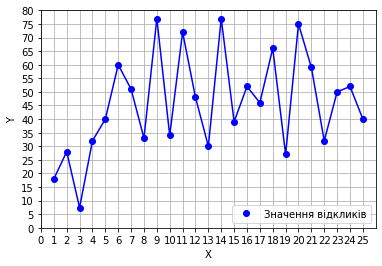

In [687]:
plt.plot(task1_data, 'bo', label = 'Значення відкликів')
plt.plot(task1_data, 'b')
plt.axis([0, 26, 5, 80])
plt.xticks(np.arange(0, 26, 1))
plt.yticks(np.arange(0, 85, 5))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.savefig('./pictures/task1_data.png', dpi=300)

За розташуванням значень відкликів на площині стає зрозуміло, що залежність є нелінійна і схожа на квадратичну $\Rightarrow$ розглянемо модель $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2$

## За МНК знайти оцінки параметрів вибраної моделі

Матриця плану для вибраної моделі матиме вигляд:
\begin{equation}\label{eq:}
    F = 
    \begin{pmatrix}
        1 & 1 & \dots & 1 \\
        1 & 2 & \dots & 25 \\
        1^2 & 2^2 & \dots & 25^2 \\
    \end{pmatrix}^T
\end{equation}


In [688]:
F_1 = np.array([[1 for i in range(1, 26)], [i for i in range(1, 26)], [
             i**2 for i in range(1, 26)]]).transpose()
F_1

array([[  1,   1,   1],
       [  1,   2,   4],
       [  1,   3,   9],
       [  1,   4,  16],
       [  1,   5,  25],
       [  1,   6,  36],
       [  1,   7,  49],
       [  1,   8,  64],
       [  1,   9,  81],
       [  1,  10, 100],
       [  1,  11, 121],
       [  1,  12, 144],
       [  1,  13, 169],
       [  1,  14, 196],
       [  1,  15, 225],
       [  1,  16, 256],
       [  1,  17, 289],
       [  1,  18, 324],
       [  1,  19, 361],
       [  1,  20, 400],
       [  1,  21, 441],
       [  1,  22, 484],
       [  1,  23, 529],
       [  1,  24, 576],
       [  1,  25, 625]])

Далі обчислимо інформаційну матрицю Фішера $A = F^T F$ та дисперсійну матрицю Фішера $A^{-1}$:

In [689]:
A_1 = F_1.transpose() @ F_1
A_1

array([[     25,     325,    5525],
       [    325,    5525,  105625],
       [   5525,  105625, 2153645]])

In [690]:
A_1_inv = np.linalg.inv(A_1)
A_1_inv

array([[ 4.24347826e-01, -6.65217391e-02,  2.17391304e-03],
       [-6.65217391e-02,  1.33296172e-02, -4.83091787e-04],
       [ 2.17391304e-03, -4.83091787e-04,  1.85804534e-05]])

In [691]:
mu_1_vals = task1_data['Y'].to_numpy()
mu_1_vals.shape = (-1, 1)
mu_1_vals

array([[18. ],
       [28. ],
       [ 7.4],
       [32. ],
       [40. ],
       [60. ],
       [51. ],
       [33. ],
       [77. ],
       [34. ],
       [72. ],
       [48. ],
       [30. ],
       [77. ],
       [39. ],
       [52. ],
       [46. ],
       [66. ],
       [27. ],
       [75. ],
       [59. ],
       [32. ],
       [50. ],
       [52. ],
       [40. ]])

In [692]:
beta_1_estim = A_1_inv @ F_1.transpose() @ mu_1_vals
beta_1_estim

array([[14.87078261],
       [ 5.24209959],
       [-0.16833519]])

In [693]:
def regres_t1(x):
    return beta_1_estim[0, 0] + beta_1_estim[1, 0] * x + beta_1_estim[2, 0] * x**2

## Перевірка адекватності побудованої моделі

\begin{equation}
    (\sigma^2)^{**} = \frac{1}{n-m} ||\vec{\eta} - F\vec{\beta}^*||^2
\end{equation}

\begin{equation}
    D^{**}_{\eta} = \frac{1}{n-1}\sum_{i=1}^n (\eta_i - \overline{\eta})^2
\end{equation}


In [694]:
# (2)
sigma_1 = (1/(n-m)) * np.linalg.norm(mu_1_vals - F_1 @ beta_1_estim)
sigma_1

3.4803084612152233

In [695]:
# (3)
D_1 = (n/(n-1))*mu_1_vals.var()
D_1

348.3797333333334

In [696]:
gamma_adeq_1 = sigma_1 / D_1
gamma_adeq_1

0.009989985433180259

## Значущість найменшого параметру

In [697]:
gamma_rel_1 = beta_1_estim[2, 0] / (np.sqrt(sigma_1 * A_1_inv[2, 2]))
gamma_rel_1

-20.933309526336764

## Довірчі інтервали

In [698]:
x_1 = 26
x_vec_1 = np.array([[1],[26],[26**2]])
t_1 = 2.074
left_mean_1 = regres_t1(x_1) - t_1*np.sqrt(sigma_1 * (x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
right_mean_1 = regres_t1(x_1) + t_1*np.sqrt(sigma_1 * (x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
(left_mean_1, right_mean_1)

(34.85032956118128, 39.89123565621064)

In [699]:
left_val_1 = regres_t1(x_1) - t_1*np.sqrt(sigma_1 * (1 + x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
right_val_1 = regres_t1(x_1) + t_1*np.sqrt(sigma_1 * (1 + x_vec_1.transpose() @ A_1_inv @ x_vec_1)[0,0])
(left_val_1, right_val_1)

(32.75308330241364, 41.98848191497828)

## Висновки

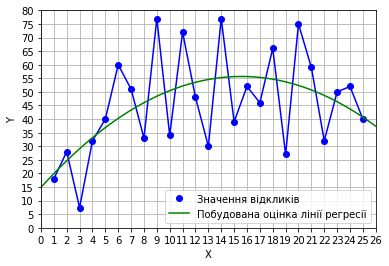

In [700]:
plt.plot(task1_data, 'bo', label = 'Значення відкликів')
plt.plot(task1_data, 'b')
plt.axis([0, 26, 5, 80])
t = np.arange(0, 26, 0.01)
plt.plot(t, [regres_t1(i) for i in t], 'g', label = 'Побудована оцінка лінії регресії')
plt.xticks(np.arange(0, 27, 1))
plt.yticks(np.arange(0, 85, 5))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.savefig('./pictures/task1_fin.png', dpi=300)

# Задание 

## Аналіз вибірки та вибір регресійної моделі

In [701]:
task2_data = pd.DataFrame({'X1': [1, 4, 9, 11, 3, 8, 5, 10, 2, 7, 6],
                           'X2': [8, 2, -8, -10, 6, -6, 0, -12, 4, -2, -4],
                           'Y': [6, 8, 1, 0, 5, 3, 2, -4, 10, -3, 5]})
task2_data

,X1,X2,Y
0,1,8,6
1,4,2,8
2,9,-8,1
3,11,-10,0
4,3,6,5
5,8,-6,3
6,5,0,2
7,10,-12,-4
8,2,4,10
9,7,-2,-3


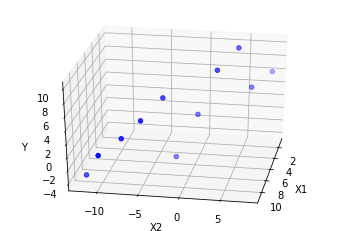

In [702]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(task2_data['X1'].to_numpy(), task2_data['X2'].to_numpy(), task2_data['Y'].to_numpy(), c="b")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 10)
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([-10, -5, 0, 5, 10])
ax.set_zticks([-4, -2, 0, 2, 4, 6, 8, 10])
plt.show()
fig.savefig('./pictures/task2_data.png', dpi=300)

## За МНК знайти оцінки параметрів вибраної моделі

Розглянемо просту регрессійну модель $f(x_1, x_2) = \beta_0 + \beta_1x_1+ \beta_2x_2$.
Матриця плану матиме вигляд:
\begin{equation}
F = 
\begin{pmatrix}
        1 & 1 & 1 & \dots & 1 \\
        1 & 4 & 9 & \dots & 6 \\
        8 & 2 & -8 & \dots & -4 \\
    \end{pmatrix}^T
\end{equation}

In [703]:
F_2 = np.vstack([np.ones(11), task2_data['X1'].to_numpy(),
                 task2_data['X2'].to_numpy()]).transpose()
F_2

array([[  1.,   1.,   8.],
       [  1.,   4.,   2.],
       [  1.,   9.,  -8.],
       [  1.,  11., -10.],
       [  1.,   3.,   6.],
       [  1.,   8.,  -6.],
       [  1.,   5.,   0.],
       [  1.,  10., -12.],
       [  1.,   2.,   4.],
       [  1.,   7.,  -2.],
       [  1.,   6.,  -4.]])

In [704]:
A_2 = F_2.transpose() @ F_2
A_2

array([[  11.,   66.,  -22.],
       [  66.,  506., -346.],
       [ -22., -346.,  484.]])

In [705]:
A_2_inv = np.linalg.inv(A_2)
A_2_inv

array([[ 4.37047898, -0.84946237, -0.40860215],
       [-0.84946237,  0.16897081,  0.08218126],
       [-0.40860215,  0.08218126,  0.0422427 ]])

In [706]:
mu_2_vals = task2_data['Y'].to_numpy()
mu_2_vals.shape = (11, 1)
mu_2_vals

array([[ 6],
       [ 8],
       [ 1],
       [ 0],
       [ 5],
       [ 3],
       [ 2],
       [-4],
       [10],
       [-3],
       [ 5]])

In [707]:
beta_2_estim = A_2_inv @ F_2.transpose() @ mu_2_vals
beta_2_estim

array([[14. ],
       [-2. ],
       [-0.5]])

In [708]:
def regres_t2(x1, x2):
    return 14 - (2 * x1) - (0.5 * x2)

## Перевірка адекватності побудованої моделі

\begin{equation}
    (\sigma^2)^{**} = \frac{1}{n-m} ||\vec{\eta} - F\vec{\beta}^*||^2
\end{equation}

\begin{equation}
    D^{**}_{\eta} = \frac{1}{n-1}\sum_{i=1}^n (\eta_i - \overline{\eta})^2
\end{equation}


In [709]:
# (2)
sigma_2 = (1/(n-m)) * np.linalg.norm(mu_2_vals - F_2 @ beta_2_estim)
# (3)
D_2 = (n/(n-1))*mu_2_vals.var()
gamma_adeq_2 = sigma_2 / D_2
gamma_adeq_2

0.020832533687331335

## Значущість найменшого параметру

In [710]:
gamma_rel_2 = beta_2_estim[2, 0] / (np.sqrt(sigma_2 * A_2_inv[2, 2]))
gamma_rel_2

-3.973546173113488

## Довірчі інтервали

In [711]:
x1_2 = 10
x2_2 = -9
x_vec_2 = np.array([[1],[10],[-9]])
t_2 = 2.306
left_mean_2 = regres_t2(x1_2, x2_2) - t_2*np.sqrt(sigma_2 * (x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
right_mean_2 = regres_t2(x1_2, x2_2) + t_2*np.sqrt(sigma_2 * (x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
(left_mean_2, right_mean_2)

(-2.2229001697031765, -0.7770998302968236)

In [712]:
left_val_2 = regres_t2(x1_2, x2_2) - t_2*np.sqrt(sigma_2 * (1 + x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
right_val_2 = regres_t2(x1_2, x2_2) + t_2*np.sqrt(sigma_2 * (1 + x_vec_2.transpose() @ A_2_inv @ x_vec_2)[0,0])
(left_val_2, right_val_2)

(-3.0861218030584903, 0.08612180305849049)

## Висновки

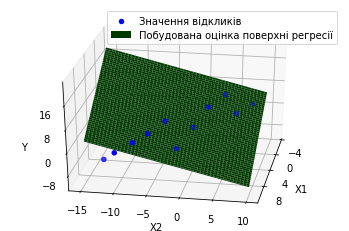

In [713]:
X1 = np.arange(0, 10, 0.1)
X2 = np.arange(-15, 10, 0.1)
X1, X2 = np.meshgrid(X1, X2)
Y = regres_t2(X1, X2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(task2_data['X1'].to_numpy(), task2_data['X2'].to_numpy(), task2_data['Y'].to_numpy(), c="b", label = 'Значення відкликів')
surf = ax.plot_surface(X1, X2, Y, color='g', label='Побудована оцінка поверхні регресії')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30, azim = 10)
ax.set_xticks([-4, 0, 4, 8])
ax.set_yticks([-15, -10, -5, 0, 5, 10])
ax.set_zticks([-8, 0, 8, 16])
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax.legend()
plt.show()
fig.savefig('./pictures/task2_fin.png', dpi=300)

# Задание

## Аналіз вибірки та вибір регресійної моделі

In [714]:
X1 = [173.5, 194.05, 209.37, 221.52, 231.49, 239.88,
      247.04, 253.22, 258.59, 263.29, 267.42, 271.05,
      274.24, 277.06, 279.53, 281.69, 283.58, 285.21,
      286.62, 287.81, 288.81, 289.63, 290.28, 290.78,
      291.13, 291.35, 291.43, 291.4, 291.25, 291.00]
X2 = [83.0, 74.25, 65.0, 56.25, 45.0, 38.25, 36.0,
      27.25, 16.0, 12.25, 9.0, 6.25, -1.0, -1.75,
      -5.0, 0.0, 0.0, 4.0, 7.0, 11.0, 11.0, 16.0,
      21.0, 27.0, 33.0, 39.0, 44.0, 52.0, 60.0, 69.0]
X3 = [22.0, 48.0, 56.0, 81.0, 89.0, 100.0, 126.0, 132.0,
      151.0, 174.0, 186.0, 203.0, 223.0, 238.0, 246.0,
      259.0, 282.0, 288.0, 304.0, 320.0, 353.0, 353.0, 377.0,
      402.0, 402.0, 418.0, 438.0, 452.0, 477.0, 493.0]
Y = [169.91, 138.22, 69.01, 72.50, 40.83, 96.49, 82.22, 115.50, 
     126.87, 160.31, 159.74, 215.98, 196.75, 237.24, 217.10,
     254.34, 205.54, 238.28, 222.52, 235.60, 208.35, 249.94, 
     208.17, 260.02, 217.63, 216.33, 208.81, 234.50, 212.37, 241.34]
task3_data = pd.DataFrame({'X1':X1, 'X2':X2, 'X3':X3, 'Y':Y}, 
                          index=[i for i in range(1, 31)])
task3_data

,X1,X2,X3,Y
1,173.50,83.00,22.0,169.91
2,194.05,74.25,48.0,138.22
3,209.37,65.00,56.0,69.01
4,221.52,56.25,81.0,72.50
5,231.49,45.00,89.0,40.83
6,239.88,38.25,100.0,96.49
7,247.04,36.00,126.0,82.22
8,253.22,27.25,132.0,115.50
9,258.59,16.00,151.0,126.87
10,263.29,12.25,174.0,160.31


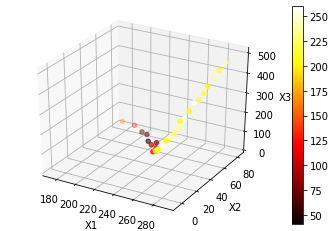

In [715]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X1, X2, X3, c=Y, cmap=plt.hot())
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
fig.colorbar(img)
plt.show()
fig.savefig('./pictures/task3_data.png', dpi=300)

## За МНК знайти оцінки параметрів вибраної моделі

Розглянемо просту регрессійну модель $f(x_1, x_2) = \beta_0 + \beta_1x_1+ \beta_2x_2 + \beta_3x_3$.

Розглянемо просту регрессійну модель $f(x_1, x_2) = \beta_0 + \beta_1x_1+ \beta_2x_2$.
Матриця плану матиме вигляд:
\begin{equation}
F = 
\begin{pmatrix}
        1 & 1 & 1 & \dots & 1 \\
        173.5 & 194.05 & 209.37 & \dots & 291 \\
        83 & 74.25 & 65 & \dots & 69 \\
        22 & 48 & 56 & \dots & 493 \\
    \end{pmatrix}^T
\end{equation}

In [716]:
F_3 = np.array([[1 for i in range(0,30)], X1, X2, X3]).transpose()
F_3

array([[  1.  , 173.5 ,  83.  ,  22.  ],
       [  1.  , 194.05,  74.25,  48.  ],
       [  1.  , 209.37,  65.  ,  56.  ],
       [  1.  , 221.52,  56.25,  81.  ],
       [  1.  , 231.49,  45.  ,  89.  ],
       [  1.  , 239.88,  38.25, 100.  ],
       [  1.  , 247.04,  36.  , 126.  ],
       [  1.  , 253.22,  27.25, 132.  ],
       [  1.  , 258.59,  16.  , 151.  ],
       [  1.  , 263.29,  12.25, 174.  ],
       [  1.  , 267.42,   9.  , 186.  ],
       [  1.  , 271.05,   6.25, 203.  ],
       [  1.  , 274.24,  -1.  , 223.  ],
       [  1.  , 277.06,  -1.75, 238.  ],
       [  1.  , 279.53,  -5.  , 246.  ],
       [  1.  , 281.69,   0.  , 259.  ],
       [  1.  , 283.58,   0.  , 282.  ],
       [  1.  , 285.21,   4.  , 288.  ],
       [  1.  , 286.62,   7.  , 304.  ],
       [  1.  , 287.81,  11.  , 320.  ],
       [  1.  , 288.81,  11.  , 353.  ],
       [  1.  , 289.63,  16.  , 353.  ],
       [  1.  , 290.28,  21.  , 377.  ],
       [  1.  , 290.78,  27.  , 402.  ],
       [  1.  , 

In [717]:
A_3 = F_3.transpose() @ F_3
A_3

array([[3.00000000e+01, 7.99322000e+03, 8.54750000e+02, 7.69300000e+03],
       [7.99322000e+03, 2.15942648e+06, 2.14141928e+05, 2.16280975e+06],
       [8.54750000e+02, 2.14141928e+05, 4.32169375e+04, 2.05253000e+05],
       [7.69300000e+03, 2.16280975e+06, 2.05253000e+05, 2.53984700e+06]])

In [718]:
A_3_inv = np.linalg.inv(A_3)
A_3_inv

array([[ 6.64605107e+01, -2.81140681e-01, -1.66116598e-01,
         5.15263429e-02],
       [-2.81140681e-01,  1.19313228e-03,  6.97009749e-04,
        -2.20787398e-04],
       [-1.66116598e-01,  6.97009749e-04,  4.61174246e-04,
        -1.27654103e-04],
       [ 5.15263429e-02, -2.20787398e-04, -1.27654103e-04,
         4.26523207e-05]])

In [719]:
mu_3_vals = task3_data['Y'].to_numpy()
mu_3_vals.shape = (30, 1)
mu_3_vals

array([[169.91],
       [138.22],
       [ 69.01],
       [ 72.5 ],
       [ 40.83],
       [ 96.49],
       [ 82.22],
       [115.5 ],
       [126.87],
       [160.31],
       [159.74],
       [215.98],
       [196.75],
       [237.24],
       [217.1 ],
       [254.34],
       [205.54],
       [238.28],
       [222.52],
       [235.6 ],
       [208.35],
       [249.94],
       [208.17],
       [260.02],
       [217.63],
       [216.33],
       [208.81],
       [234.5 ],
       [212.37],
       [241.34]])

In [720]:
beta_3_estim = A_3_inv @ F_3.transpose() @ mu_3_vals
beta_3_estim

array([[ 1.31498928e+03],
       [-5.06946492e+00],
       [-3.68609960e+00],
       [ 1.26540668e+00]])

In [721]:
def regres_t3(x1, x2, x3):
    return 1.31498928e+03 - (5.06946492e+00 * x1) - (3.68609960e+00 * x2) + (1.26540668e+00 * x3)

## Перевірка адекватності побудованої моделі

\begin{equation}
    (\sigma^2)^{**} = \frac{1}{n-m} ||\vec{\eta} - F\vec{\beta}^*||^2
\end{equation}

\begin{equation}
    D^{**}_{\eta} = \frac{1}{n-1}\sum_{i=1}^n (\eta_i - \overline{\eta})^2
\end{equation}

In [722]:
# (2)
sigma_3 = (1/(n-m)) * np.linalg.norm(mu_3_vals - (F_3 @ beta_3_estim))
# (3)
D_3 = (n/(n-1))*mu_3_vals.var()
gamma_adeq_3 = sigma_3 / D_3
gamma_adeq_3

0.0014128874889413868

## Значущість найменшого параметру

In [723]:
gamma_rel_3 = beta_3_estim[3, 0] / (np.sqrt(sigma_3 * A_3_inv[3, 3]))
gamma_rel_3

81.95744419563465

## Довірчі інтервали

In [724]:
x1_3 = 230
x2_3 = 46
x3_3 = 90
x_vec_3 = np.array([[1],[230],[46],[90]])
t_3 = 2.056
left_mean_3 = regres_t3(x1_3, x2_3, x3_3) - t_3*np.sqrt(sigma_3 * (x_vec_3.transpose() @ A_3_inv @ x_vec_3)[0,0])
right_mean_3 = regres_t3(x1_3, x2_3, x3_3) + t_3*np.sqrt(sigma_3 * (x_vec_3.transpose() @ A_3_inv @ x_vec_3)[0,0])
(left_mean_3, right_mean_3)

(91.67584237035044, 95.00089362964965)

In [725]:
left_val_3 = regres_t3(x1_3, x2_3, x3_3) - t_3*np.sqrt(sigma_3 * (1 + x_vec_3.transpose() @ A_3_inv @ x_vec_3)[0,0])
right_val_3 = regres_t3(x1_3, x2_3, x3_3) + t_3*np.sqrt(sigma_3 * (1 + x_vec_3.transpose() @ A_3_inv @ x_vec_3)[0,0])
(left_val_3, right_val_3)

(88.20126603547034, 98.47546996452975)

## Висновки

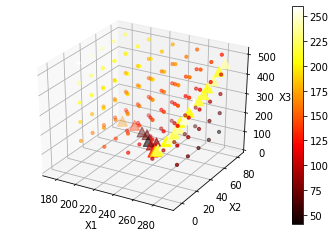

In [726]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, X3, c=Y, cmap=plt.hot(), marker='^', s = 100)
t1 = np.linspace(180, 280, 5)
t2 = np.linspace(20, 80, 5)
t3 = np.linspace(100, 500, 5)
t1, t2, t3 = np.meshgrid(t1, t2, t3)
ax.scatter(t1, t2, t3, c=regres_t3(t1, t2, t3), cmap=plt.hot(), s = 10)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
fig.colorbar(img)
plt.show()
fig.savefig('./pictures/task3_ fin.png', dpi=300)